<a href="https://colab.research.google.com/github/JacekGebo/PAD_Projekt/blob/main/Projekt_s26463.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza danych w Python 3.8. C3. Regresja logistyczna.
#### Celem tego ćwiczenia jest przedstawienie modelu regresji liniowej, dzięki któremu będziemy w stanie przewidzieć zmienną na podstawie innych zmiennych.
##### Wojciech Oronowicz-Jaśkowiak

## 1. Zaimportowanie bibliotek.


In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.getcwd()

'/content/drive/My Drive'

In [4]:
df = pd.read_csv('Airline_Customers.csv')

In [5]:
df.isnull().any()

satisfaction                         False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
dtype: bool

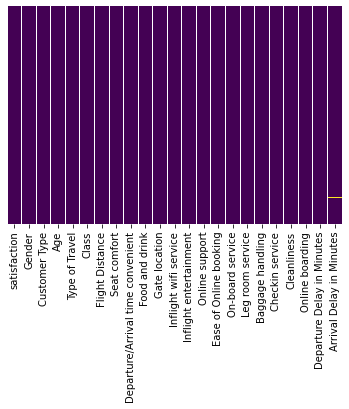

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df=df.fillna(0);

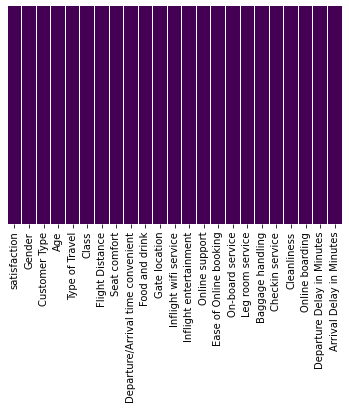

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

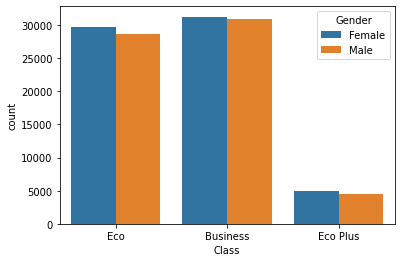

In [9]:
sns.countplot(x='Class', hue="Gender", data=df)

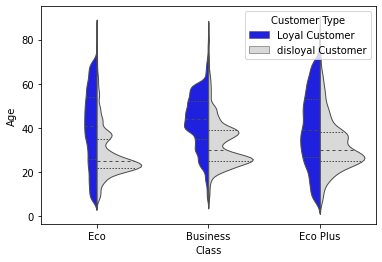

In [10]:
sns.violinplot(data=df, x="Class", y="Age", hue="Customer Type", split=True, inner="quart", linewidth=1,
               palette={"Loyal Customer": "b", "disloyal Customer": ".85"})

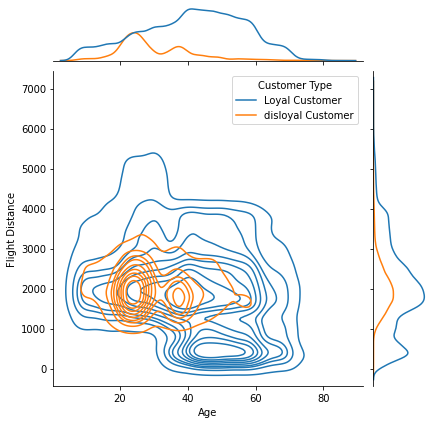

In [11]:
sns.jointplot(x='Age',y='Flight Distance',data=df,kind='kde', hue="Customer Type");

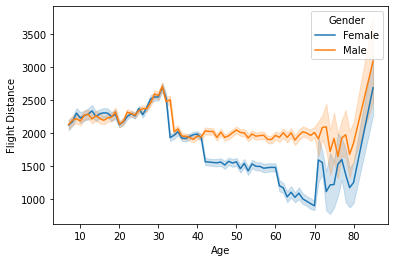

In [12]:
sns.lineplot(x="Age", y="Flight Distance", hue="Gender", data=df)

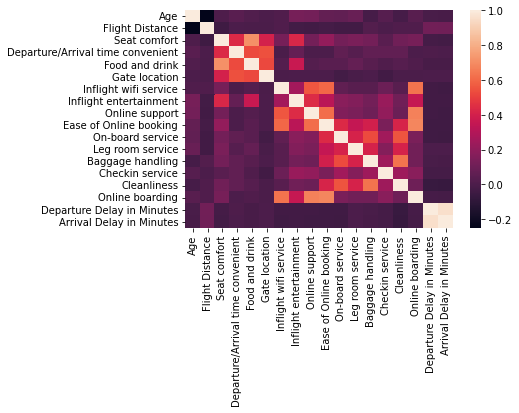

In [13]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Analiza korelacji')

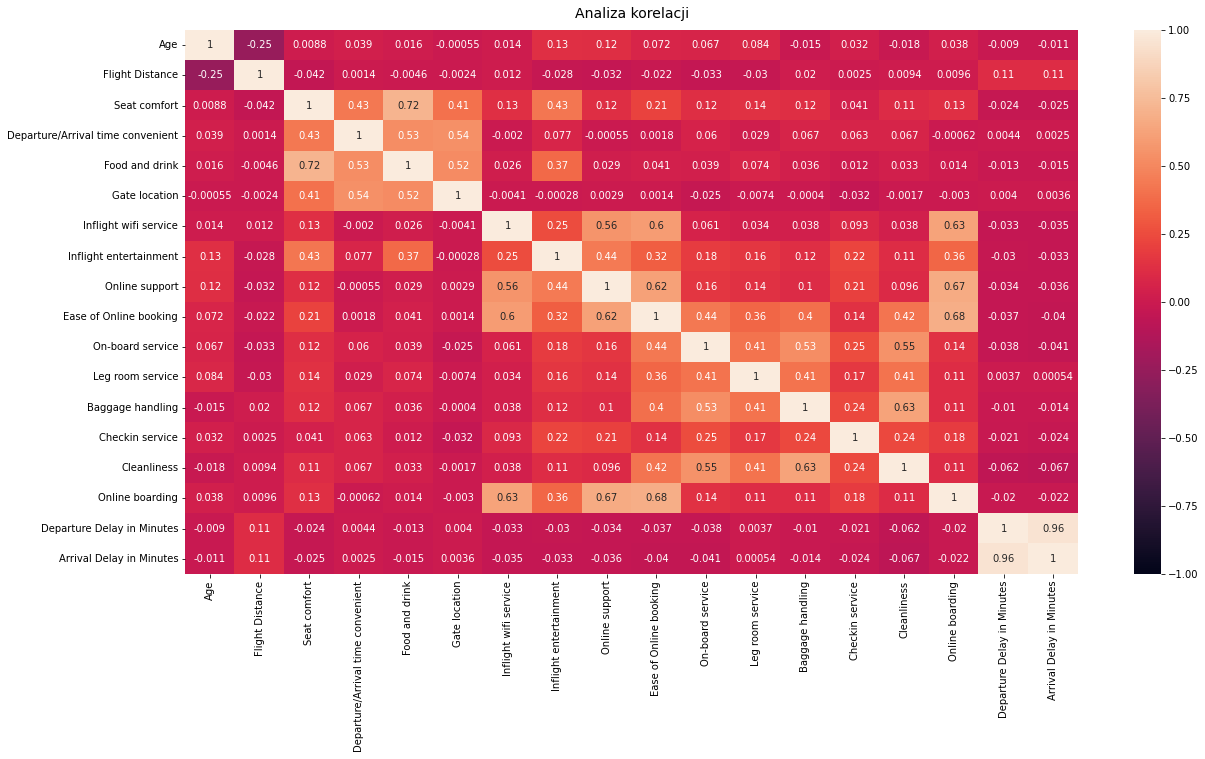

In [14]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Analiza korelacji', fontdict={'fontsize':14}, pad=12)

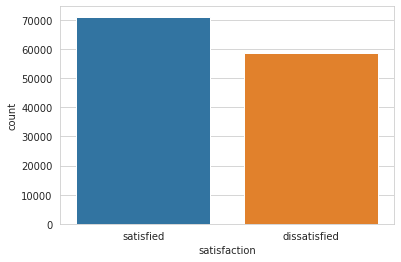

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='satisfaction',data=df)

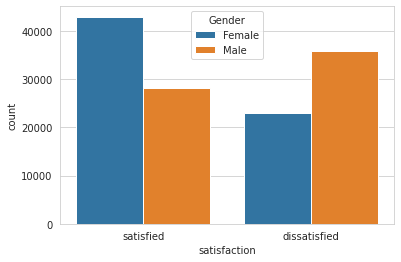

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='satisfaction',hue='Gender',data=df)

In [17]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [18]:
satisfaction = pd.get_dummies(df['satisfaction'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)
customer_type = pd.get_dummies(df['Customer Type'],drop_first=False)
type_of_travel = pd.get_dummies(df['Type of Travel'],drop_first=True)

In [19]:
encoder = LabelEncoder()
df.loc[:,"Class"] = encoder.fit_transform(df.loc[:,"Class"])

In [20]:
satisfaction

,satisfied
0,1
1,1
2,1
3,1
4,1
...,...
129875,1
129876,0
129877,0
129878,0


In [21]:
gender

,Male
0,0
1,1
2,0
3,0
4,0
...,...
129875,0
129876,1
129877,1
129878,1


In [22]:
customer_type

,Loyal Customer,disloyal Customer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
129875,0,1
129876,0,1
129877,0,1
129878,0,1


In [23]:
df = pd.concat([df, satisfaction, gender, customer_type, type_of_travel],axis=1)

In [24]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,Loyal Customer,disloyal Customer,Personal Travel
0,satisfied,Female,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1,0,1
1,satisfied,Male,Loyal Customer,47,Personal Travel,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,1,1,0,1
2,satisfied,Female,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1,0,1
3,satisfied,Female,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1,0,1
4,satisfied,Female,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1,0,1


In [25]:
df.drop(['satisfaction','Gender',	'Customer Type','Type of Travel'	],axis=1,inplace=True)

In [26]:
df.head()

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,Loyal Customer,disloyal Customer,Personal Travel
0,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1,0,1
1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,1,1,0,1
2,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1,0,1
3,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1,0,1
4,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1,0,1


In [27]:
X = df.drop('satisfied', axis=1)
y = df['satisfied']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('satisfied',axis=1), 
                                                    df['satisfied'], test_size=0.10, 
                                                    random_state=101)

In [29]:
df.head()

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,Loyal Customer,disloyal Customer,Personal Travel
0,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1,0,1
1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,1,1,0,1
2,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1,0,1
3,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1,0,1
4,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1,0,1


In [30]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5972
           1       0.84      0.85      0.84      7016

    accuracy                           0.83     12988
   macro avg       0.83      0.83      0.83     12988
weighted avg       0.83      0.83      0.83     12988



In [32]:
confusion_matrix(y_test, predictions)

array([[4803, 1169],
       [1052, 5964]])

Text(0.5, 1.0, 'Analiza korelacji')

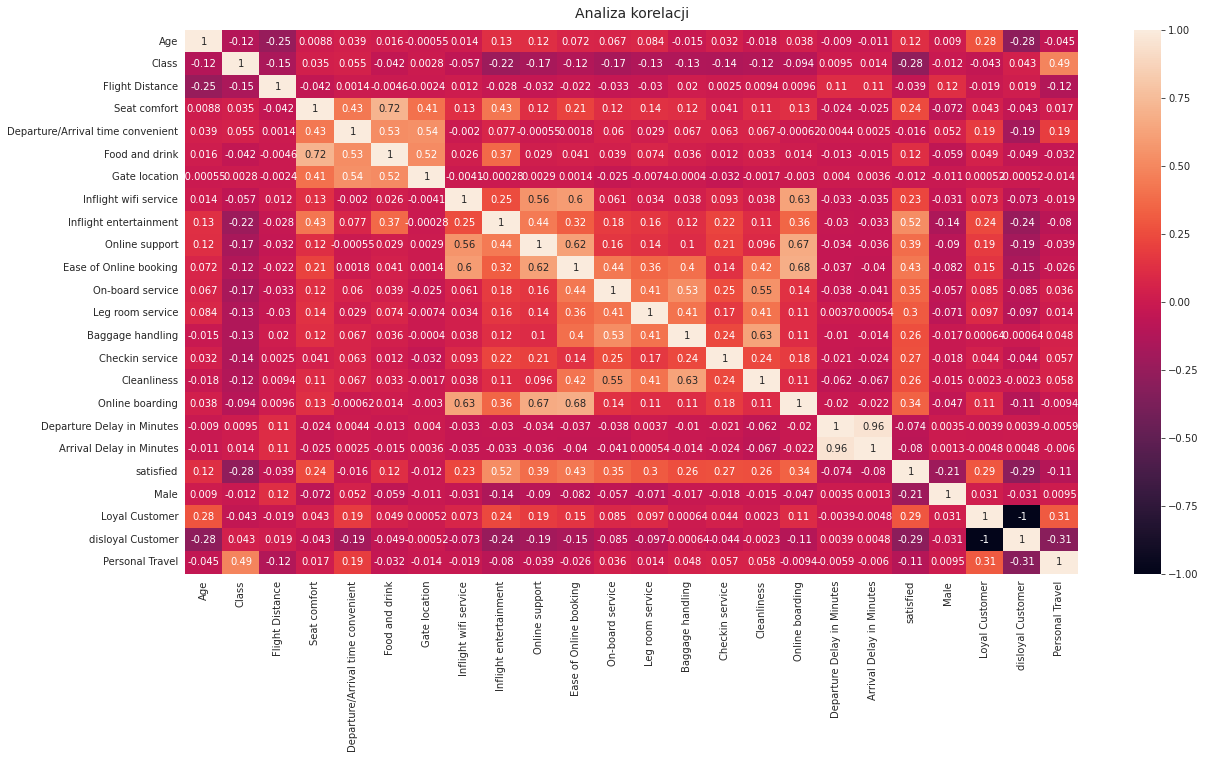

In [33]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Analiza korelacji', fontdict={'fontsize':14}, pad=12)